# 独立成分分析(Independent component analysis,ICA)

独立成分分析是一种线性因子建模的方法，旨在将观察到的信号分离成许多潜在信号，这些潜在信号通过缩放和叠加可以恢复成观察数据。也就是说ICA解决的是原始数据分离的问题。

最典型的例子就是鸡尾酒会的盲源分离。

假设宴会上有 n 个人同时说话，在不同位置放置 m 个不同的麦克风，则 m 个麦克风得到一组声音的观察数据 $\{x^{(j)}_i;j=1,2,⋯,m，i=1,2,...,n\}$，j 表示采样的时间顺序，也就是说有 m 组采样，其中每个样本$x^{(j)}$都是 n 维，记$X=(x^{(j)}_i)_{n*1}$。ICA的目标就是从采样的声音数据中分辨出每个人说的话。

将鸡尾酒会问题具体化如下：假设有 n 个信号源 $s=(s_1,...,s_n)^T$ ，每个 $s_i$ 都是一个声音信号，不同的信号之间彼此独立。设 A 是未知的混合矩阵，用来组合 n 个信号源，那么$$X=As$$

图示如下：
![image.png](./img/image.png)

[图片来源](http://amouraux.webnode.com/research-interests/research-interests-erp-analysis/blind-source-separation-bss-of-erps-using-independent-component-analysis-ica/)

每个$x^i$都由$s$的各分量线性组合来表示。A和s都是未知的，X是观测到的，现在要根据X推出s，这个过程称为盲源分离。

令$W=A^{-1}$，那么$s^{(i)}=A^{-1}X^{(i)}=WX^{(i)}$，其中

$$W={(w_1,...,w_n)}^T,w_i \in R^n$$ 

从而，$s_j^{(i)}=w_j^Tx^{(i)}$.

### 1. ICA的假设条件

（1）各个成分之间相互统计独立

随机变量之间的统计独立性可以通过概率密度函数来刻画。如果用$p(y_1,...,y_n)$表示$y_i(i=1,...,n)$的联合概率密度函数，用$p_i(y_i)$表示随机变量$y_i(i=1,...,n)$的边际概率密度函数，那么我们说$y_i(i=1,...,n)$是相互统计独立的，如果满足：

$$p(y_1,...,y_n)=\prod_{i=1}^{n}p_i(y_i)$$

（2）独立成分具有非高斯性

假设有两个成分满足高斯分布，$s$服从$N(0,I)$，$I$是2*2的单位矩阵。由于$X=As$，因此$X$也是高斯分布的，均值为 0，协方差矩阵为$E[XX^T]=E[Ass^TA^T]=AA^T$.令$R$是正交矩阵，$A'=AR$,$X'=A's$，那么$X'$也是高斯分布的，均值为 0，协方差矩阵为$E[X'X'^T]=E[A'ss^TA'^T]=A'A'^T=ARR^TA^T=AA^T$. 因此无论混合矩阵为$A$或$A'$时，$X$的分布情况是一样的，从而无法确定混合矩阵，也就无法确定源信号。

（3）混合矩阵为满秩的方阵

对于标准的独立成分分析而言，混合矩阵为满秩的方阵是必要的。

### 2. ICA的不确定性

（1） 独立成分的方差无法确定

原因是很明显的，由于混合矩阵及独立成分都无法确定，因此扩大或缩小若干倍独立成分后都可以由混合矩阵缩小或扩大相应倍数来达到平衡。因此，在独立成分分析中，一般固定独立成分的方差为单位方差。

（2） 独立成分的顺序无法确定

这也是很显然的。设 P 是初等矩阵，则$X=As=AP^{-1}Ps$中对 s 作行变换得到重新排序的独立成分$Ps$，此时混合矩阵变为$AP^{-1}$. 换句话说，若把独立成分的位置作一些变换，则把混合矩阵的相应的列作同样变换即可得到同样的观察信号。


### 3.数据的预处理

（1）归一化

通过$X-E[X]$使得$X$成为0均值。

（2）白化

白化的作用是使得各成分彼此不相关，并且方差为1.也就是说，使得白化后的$X$(记作$\bar X$)的协方差矩阵为单位矩阵：
$$E(\bar X\bar X^T)=I$$

通过特征值分解即可达到此目的。设$E[XX^T]=EDE^T$,其中$E$是协方差矩阵$E[XX^T]$的特征向量构成的正交矩阵，$D$是特征值构成的对角矩阵。那么，白化向量可以通过如下方式获得：

$$\bar X =D^{-\frac{1}{2}}E^TX$$

验证$E(\bar X\bar X^T)=I$是很容易的。

作白化转换之后，混合矩阵也发生了变化，新的混合矩阵成为了正交矩阵：

$$\bar X=D^{-\frac{1}{2}}E^TAs=\bar As$$

$$E[\bar X\bar X^T]=\bar AE[ss^T]\bar A^T=\bar A\bar A^T=I$$

可以看到，作白化处理之前，需要估计$n^2$个参数，而白化之后，正交矩阵的自由度为$n(n-1)/2$,大大减少了工作量。

### 4. ICA算法

ICA算法的研究可分为基于信息论准则的迭代估计方法和基于统计学的代数方法两大类，从原理上来说，它们都是利用了源信号的独立性和非高斯性。基于信息论的方法研究中，各国学者从最大熵、最小互信息、最大似然和负熵最大化等角度提出了一系列估计算法，如FastICA算法, Infomax算法，最大似然估计算法等。基于统计学的方法主要有二阶累积量、四阶累积量等高阶累积量方法。本文接下来内容介绍基于信息论的最大似然估计算法及负熵最大化算法，并给出基于负熵最大化的FastICA算法的代码实现，尝试分离出具有两个独立成分的混合信号。

#### 4.1 最大似然估计算法

假定每个源信号$s_i (i=1,...,n)$各自独立，且$s_i$的概率密度函数为$p_s$，那么给定时刻源信号的联合分布密度函数是

$$p(s)=\prod_{i=1}^{n}p_s(s_i) ,$$

那么$$p(X)=p_s(WX)\left | W \right |=\left | W \right |\prod_{i=1}^{n}p_s(w_i^TX)$$

上式中左边等号推导如下：

$$F_X(x)=P(X\leq x)=P(As\leq x)=P(s\leq Wx)=F_s(Wx)$$

$$p_x(x)=F'_X(x)=F'_s(Wx)=p_s(Ws)\left | W \right |  .$$

此时，要得到$W$和$s_i$ ，需要知道概率密度函数$p_s(s_i)$。而密度函数是由累计分布函数求导得到，不妨记累计分布函数为$F(x)$，$F(x)$应满足单调递增且值域为$[0,1]$两个条件。

如果无法预知$s$的分布函数，那么需要我们进行假设。考虑sigmod函数良好满足累计分布函数的性质，因此将其赋给$F(x)$，在大多数情况中sigmod函数能取得不错的效果。

假设$s_i$的累计分布函数为

$$g(s_i)=\frac{1}{1+e^{-s_i}}$$

求导可以得到

$$p_s(s_i)=g'(s_i)=\frac{e^{-s_i}}{(1+e^{-s_i})^2}$$

接下来采用最大似然法来估计$W$，使用前面得到的$X$的概率密度函数，可得

$$L(W)=\sum_{i=1}^{m}(\sum_{j=1}^{n}\log g'(w_j^TX^{(i)})+\log \left | W \right |)$$

接下来就是对$W$求导(矩阵求导请参考线性代数相关知识)，这里直接给出公式：

$$\bigtriangledown _W\left | W \right |=\left | W \right |(W^{-1})^T$$

使用梯度下降法计算后，最终求导结果为：

$$W:=W+\alpha \begin{pmatrix}\begin{bmatrix} 1-2g(w_1^TX^{(i)})\\ 1-2g(w_2^TX^{(i)})\\  \vdots \\  1-2g(w_n^TX^{(i)})\end{bmatrix}X^{{(i)}^T}+(W^T)^{-1} \end{pmatrix}$$

其中$\alpha $是学习率。

迭代求出$W$后，根据$s^{(i)}=WX^{(i)}$便可还原出原始信号。









#### 4.2 负熵最大化算法

由信息论理论可知，在所有等方差的随机变量中，高斯变量的熵最大，因此可以利用熵来度量非高斯性。连续变量的熵的定义如下：

(微分)熵：
$$H(y)=-\int f(y) \log f(y)dy$$

在实际应用中，为了使Gauss变量的非高斯性为0，并且使通常的非高斯性度量保持非负，人们度量非高斯性时更多地是采用熵的修正形式——负熵。负熵的定义如下：

负熵：
$$Ng(y)=H(y_{gauss})-H(y)$$

在上面两个等式中，$f(y)$是密度函数，$y_{gauss}$表示与随机变量$y$同方差的Gauss变量。

根据信息理论，在具有相同方差的随机变量中，高斯分布的随机变量具有最大的微分熵。当y具有高斯分布时，Ng(y)=0；y的非高斯性越强，其微分熵越小，Ng(y)的值越大,所以Ng(y)可以作为随机变量y非高斯性的度量。但是利用负熵的定义来求解负熵，需要知道密度函数，而且计算非常困难。所以在实际情况中，一般采用下面的近似公式：

$$Ng(y)=\{E[G(y)]-E[G(y_{gauss})]\}^2$$

其中，$G(.)$为非二次函数，通常可取$G_1(u)=\frac{1}{a_1}\log \cosh (a_1u)$ ,$G_2(u)=- \exp(-u^2/2)$ ,$a_1$一般可取1. 很容易得到它们的导数：

$$g_1(u)=\tanh (a_1u)$$

$$g_2(u)=u \exp (-u^2/2)$$

#### 4.2.1 FastICA算法

设$z = A^Tw$，$w$是一个列向量，那么有$y = w^TX = w^TAs = z^Ts$。由中心极限定理知道，相互独立的随机变量的和比其中任意单独的随机变量具有更强的高斯性。所以$y = z^Ts$的高斯性比任意一个$s_i$要强，当$y$等于某个$s_i$时高斯性最弱，此时向量$z$只有$z_i$分量非零。所以要分离出潜在变量就是要得到一个$w$使得$y = w^TX = z^Ts$具有最大的非高斯性。

FastICA就是基于负熵最大化的原理来估计W，找到一个方向以便$W^TX(s=W^TX)$具有最大的非高斯性，非高斯性用$Ng(s)=\{E[g(s)]-E[g(s_{gauss})]\}²$ 给出的负熵的近似值来度量。

假设数据已经经过归一化和白化处理，$w^TX$的负熵近似值可以通过$E[w^TX]$的最优值获得。根据Kuhn-Tucker条件，在$E[(w^TX)^2]=\left \| w \right \|=1$的约束条件下，$E[w^TX]$的最优值满足：

$$E[Xg(w^TX)]-\beta w =0 $$

其中$w^T$是$W$的一行，通过牛顿法求解后可得到迭代公式：

$$w^+=w-(E[Xg(w^TX)]-\beta w) / (E[g'(w^TX)]-\beta )$$

进一步化简可得到

$$w^+=E[Xg(w^TX)]-E[g'(w^TX)]w$$

因此，做一次FastICA算法的基本形式为：

1）初始化向量w；

2）令$w^+=E[Xg(w^TX)]-E[g'(w^TX)]w$；

3）令$w=w^+/\left \| w^+ \right \|$;

4）重复2）和3）直至收敛。

一次FastICA只能估算出一个独立成分，若要估计多个独立成分，需要进行多次FastICA算法来得到$w_1,w_2,...,w_n$.同时为了防止这些向量收敛在同一个最大值，需要对每次输出$w_1^TX,w_2^TX,...,w_p^TX$做去相关。

常用的去相关方法有两种，一种是Gram-Schmidt-like去相关，即一个接一个地估计独立成分。在估计出$p$个独立成分$w_1,...,w_p$之后，当估计$w_{p+1}$时先减去先前预测的$p$个向量的投影，然后标准化$w_{p+1}$；

第二种方法是对称去相关，可通过矩阵平方根完成

$$W:=(WW^T)^{-1/2}W$$

其中$W=(w_1,w_2,...,w_n)^T$,逆平方根可以通过特征值分解得到。

多个成分的估计可以通过如下迭代算法实现：

1）初始化每一个向量$w_i,i=1,2,...,n$，并进行步骤3）；

2）令$w_i=E[Xg(w_i^TX)]-E[g'(w_i^TX)]w$，$i=1,2,...,n$；

3）令$W=(WW^T)^{-1/2}W$,将$W$做对称的正交化;

4）重复2）和3）直至收敛。

实践中，FastICA算法中用的期望一般用样本均值来代替。理想状态是所有的有效样本都参与计算，但是数据量很多的时候速度很慢，这时候在保持一定量数据的前提下可分别采样。

下面给出FastICA算法的代码实现，并分离出二元混合信号的原始信号。

In [1]:
import math
import random
import matplotlib.pyplot as plt
from numpy import *
from scipy.io import wavfile
import wave
import struct


def whiten(X):
    #zero mean
    X_mean = X.mean(axis=-1)
    X -= X_mean[:, newaxis]
    #whiten
    A = dot(X, X.transpose())
    D , E = linalg.eig(A)
    D2 = linalg.inv(array([[D[0], 0.0], [0.0, D[1]]], float32))
    D2[0,0] = sqrt(D2[0,0]); D2[1,1] = sqrt(D2[1,1])
    V = dot(D2, E.transpose())
    return dot(V, X), V

def _logcosh(x, alpha = 1):
    gx = tanh(alpha * x); g_x = gx ** 2; g_x -= 1.; g_x *= -alpha
    return gx, g_x.mean(axis=-1)

def do_decorrelation(W):
    #black magic
    s, u = linalg.eigh(dot(W, W.T))
    return dot(dot(u * (1. / sqrt(s)), u.T), W)

def do_fastica(X):
    n, m = X.shape; p = float(m); g = _logcosh
    #black magic
    X *= sqrt(X.shape[1])
    #create w
    W = ones((n,n), float32)
    for i in range(n): 
        for j in range(i):
            W[i,j] = random.random()
            
    #compute W
    maxIter = 200
    for ii in range(maxIter):
        gwtx, g_wtx = g(dot(W, X))
        W1 = do_decorrelation(dot(gwtx, X.T) / p - g_wtx[:, newaxis] * W)
        lim = max( abs(abs(diag(dot(W1, W.T))) - 1) )
        W = W1
        if lim < 0.0001:
            break
    return W

def show_data(T, S):
    plt.plot(T, [S[0,i] for i in range(S.shape[1])], marker="*")
    plt.plot(T, [S[1,i] for i in range(S.shape[1])], marker="o")
    plt.show()

def main():
    
    #n_components = 2

    samplingRate_1, data_1 = wavfile.read('./data/mix1.wav')
    samplingRate_2, data_2 = wavfile.read('./data/mix2.wav')
    X = array([data_1, data_2], float32)

    Dwhiten, K = whiten(X)
    W = do_fastica(Dwhiten)
    Sr = dot(dot(W, K), X)

    #展示混合信号及分离后的信号
    show_data(range(len(data_1)), X)
    show_data(range(len(data_1)), Sr)

    filepath = './data/'
    outData_1,outData_2 = Sr[0,:],Sr[1,:]   #待写入wav的数据
    nchannels = 1
    sampwidth = 2
    fs = 8000
    data_size = len(outData_1)
    framerate = int(fs)
    nframes = data_size
    comptype = "NONE"
    compname = "not compressed"

    outfile_1 = filepath+'my_ica1.wav'
    outwave_1 = wave.open(outfile_1, 'wb')  # 定义存储路径以及文件名
    outwave_1.setparams((nchannels, sampwidth, framerate, nframes,comptype, compname))
    
    for v_1 in outData_1:
        outwave_1.writeframes(struct.pack('h', int(v_1 * 64000 / 2))) 
    outwave_1.close()
   
    outfile_2 = filepath+'my_ica2.wav'
    outwave_2 = wave.open(outfile_2, 'wb')  
    outwave_2.setparams((nchannels, sampwidth, framerate, nframes,comptype, compname))
        
    for v_2 in outData_2:
        outwave_2.writeframes(struct.pack('h', int(v_2 * 64000 / 2)))
    outwave_2.close()
    

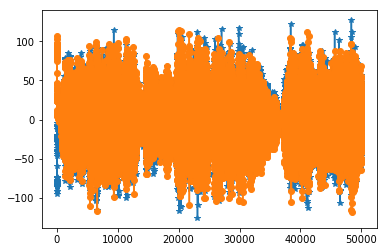

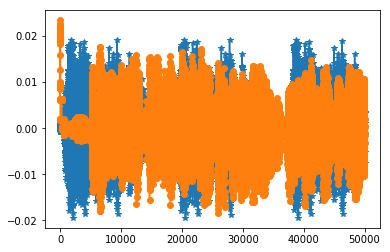

In [2]:
# run the main function
if __name__ == "__main__":
    main()

### 参考资料：
文献：https://wenku.baidu.com/view/edc760d126fff705cc170ae0.html

数据来源：https://github.com/ShashShukla/ICA/tree/master/sourceSounds
